<a href="https://colab.research.google.com/github/Flaviofrc97/DASCIENSE-MACHINE-LEARNING/blob/main/m03_v01_sales_predction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0.0. IMPORTS

In [64]:
import pandas as pd
import math
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.core.display import HTML
from IPython.display import Image as img
import datetime

## 0.1 Helper Functions

## 0.2 Loading Data

In [39]:
df_sales_raw = pd.read_csv('/content/data/train.csv', low_memory=False)
df_store_raw = pd.read_csv('/content/data/store.csv', low_memory=False)

#merge

df_raw = pd.merge(df_sales_raw, df_store_raw, how="left", on="Store")

# 1.0. PASSO 1: DESCRICAO DOS DADOS

## 1.1. Rename Columns

In [40]:
df1 = df_raw.copy()

In [41]:
cols_old = ['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval']

#convertendo para lower
df1.columns = map(str.lower, cols_old)

## 1.2. Data Dimesion

In [42]:
print('number of rows: {}'. format(df1.shape[0])) #Shape print linhas e colunas de um dataframe
print('number of cols: {}'. format(df1.shape[1])) #Shape print linhas e colunas de um dataframe

number of rows: 1017209
number of cols: 18


## 1.3. DataTypes

In [43]:
df1['date'] = pd.to_datetime(df1['date'], errors='coerce') #convertendo data para tipo date
df1.dtypes

store                                 int64
dayofweek                             int64
date                         datetime64[ns]
sales                                 int64
customers                             int64
open                                  int64
promo                                 int64
stateholiday                         object
schoolholiday                         int64
storetype                            object
assortment                           object
competitiondistance                 float64
competitionopensincemonth           float64
competitionopensinceyear            float64
promo2                                int64
promo2sinceweek                     float64
promo2sinceyear                     float64
promointerval                        object
dtype: object

## 1.4. Check NA

In [44]:
df1.isna().sum()

store                             0
dayofweek                         0
date                              0
sales                             0
customers                         0
open                              0
promo                             0
stateholiday                      0
schoolholiday                     0
storetype                         0
assortment                        0
competitiondistance            2642
competitionopensincemonth    323348
competitionopensinceyear     323348
promo2                            0
promo2sinceweek              508031
promo2sinceyear              508031
promointerval                508031
dtype: int64

## 1.5. Fillout NA

In [45]:
df1['competitiondistance'].max()

75860.0

In [46]:
df1.head()

,store,dayofweek,date,sales,customers,open,promo,stateholiday,schoolholiday,storetype,assortment,competitiondistance,competitionopensincemonth,competitionopensinceyear,promo2,promo2sinceweek,promo2sinceyear,promointerval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [47]:
# competitiondistance 

df1.competitiondistance.fillna(200000.0, inplace=True)

# competitionopensincemonth  
df1.competitionopensincemonth.fillna(df1.date.dt.month, inplace=True)

# competitionopensinceyear   

df1.competitionopensinceyear.fillna(df1.date.dt.year, inplace=True)

# promo2sinceweek  
df1.promo2sinceweek.fillna(df1.date.dt.isocalendar().week, inplace=True )

# promo2sinceyear    
df1.promo2sinceyear.fillna(df1.date.dt.isocalendar().year, inplace=True ) 

# promointerval                
#Os nomes dos intervalos estão em ingles
month_map = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sept', 10: 'Oct', 11: 'Nov', 12: 'Dec'}

df1.promointerval.fillna(0, inplace=True)

df1['month_map'] = df1['date'].dt.month.map(month_map)

df1['is_promo'] = df1[['promointerval', 'month_map']].apply( lambda x: 0 if x['promointerval'] == 0 else 1 if x['month_map'] in x['promointerval'].split( ',' ) else 0, axis=1 )

In [48]:
df1.sample(5)

,store,dayofweek,date,sales,customers,open,promo,stateholiday,schoolholiday,storetype,assortment,competitiondistance,competitionopensincemonth,competitionopensinceyear,promo2,promo2sinceweek,promo2sinceyear,promointerval,month_map,is_promo
546205,641,4,2014-02-27,4869,518,1,0,0,0,a,c,610.0,12.0,2003.0,1,36.0,2013.0,"Mar,Jun,Sept,Dec",Feb,0
977352,283,2,2013-02-05,8853,797,1,1,0,0,a,a,2260.0,2.0,2013.0,1,40.0,2014.0,"Jan,Apr,Jul,Oct",Feb,0
2961,732,3,2015-07-29,10847,1167,1,1,0,1,a,c,35280.0,7.0,2015.0,0,31.0,2015.0,0,Jul,0
768825,261,7,2013-08-11,0,0,0,0,0,0,d,c,15340.0,4.0,2015.0,1,39.0,2009.0,"Jan,Apr,Jul,Oct",Aug,0
470710,966,2,2014-05-06,5629,682,1,1,0,0,a,a,760.0,2.0,2008.0,0,19.0,2014.0,0,May,0


## 1.6. Change Types


In [49]:
df1.dtypes #Após fazer alteraçao nos dados é bom olhar o tipo pois pode ser alterado

store                                 int64
dayofweek                             int64
date                         datetime64[ns]
sales                                 int64
customers                             int64
open                                  int64
promo                                 int64
stateholiday                         object
schoolholiday                         int64
storetype                            object
assortment                           object
competitiondistance                 float64
competitionopensincemonth           float64
competitionopensinceyear            float64
promo2                                int64
promo2sinceweek                     float64
promo2sinceyear                     float64
promointerval                        object
month_map                            object
is_promo                              int64
dtype: object

In [50]:
df1['competitionopensincemonth'] = df1['competitionopensincemonth'].astype(int)
df1['competitionopensinceyear'] = df1['competitionopensinceyear'].astype(int)
df1['promo2sinceweek'] = df1['promo2sinceweek'].astype(int)
df1['promo2sinceyear'] = df1['promo2sinceyear'].astype(int)

## 1.7. Descriptive Statistical

In [51]:
num_attributes = df1.select_dtypes( include=['int64','float64'])
cat_attributes = df1.select_dtypes( exclude=['int64','float64','datetime64[ns]'])

## 1.7.1 Numerical Statistic


In [52]:
#CENTRAL TEDENCY - MEAN, MEDIAN 
ct1 = pd.DataFrame(num_attributes.apply(np.mean)).T
ct2 = pd.DataFrame(num_attributes.apply(np.median)).T

#Dispersion - std, min, max, range, skew, kurtosis
d1 = pd.DataFrame(num_attributes.apply(np.std)).T
d2 = pd.DataFrame(num_attributes.apply(np.min)).T
d3 = pd.DataFrame(num_attributes.apply(np.max)).T
d4 = pd.DataFrame(num_attributes.apply(lambda x: x.max() - x.min())).T
d5 = pd.DataFrame( num_attributes.apply(lambda x: x.skew() ) ).T
d6 = pd.DataFrame( num_attributes.apply( lambda x: x.kurtosis() ) ).T

#Concat
metrics = pd.concat( [d2, d3, d4, ct1, ct2, d1, d5, d6] ).T.reset_index()
metrics.columns = ['Attributes','Min','Max','Range','Mean','Median','Std','Skew','Kurtosis']
metrics

,Attributes,Min,Max,Range,Mean,Median,Std,Skew,Kurtosis
0,store,1.0,1115.0,1114.0,558.429727,558.0,321.908493,-0.000955,-1.200524
1,dayofweek,1.0,7.0,6.0,3.998341,4.0,1.997390,0.001593,-1.246873
2,sales,0.0,41551.0,41551.0,5773.818972,5744.0,3849.924283,0.641460,1.778375
3,customers,0.0,7388.0,7388.0,633.145946,609.0,464.411506,1.598650,7.091773
4,open,0.0,1.0,1.0,0.830107,1.0,0.375539,-1.758045,1.090723
5,promo,0.0,1.0,1.0,0.381515,0.0,0.485758,0.487838,-1.762018
6,schoolholiday,0.0,1.0,1.0,0.178647,0.0,0.383056,1.677842,0.815154
7,competitiondistance,20.0,200000.0,199980.0,5935.442677,2330.0,12547.646829,10.242344,147.789712
8,competitionopensincemonth,1.0,12.0,11.0,6.786849,7.0,3.311085,-0.042076,-1.232607
9,competitionopensinceyear,1900.0,2015.0,115.0,2010.324840,2012.0,5.515591,-7.235657,124.071304


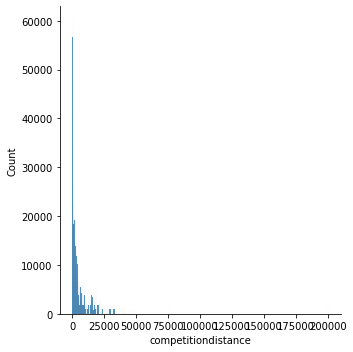

In [53]:

sns.displot(df1['competitiondistance'])


## 1.7. Categorical Statistical

In [54]:
cat_attributes.apply( lambda x: x.unique().shape[0])

stateholiday      4
storetype         4
assortment        3
promointerval     4
month_map        12
dtype: int64

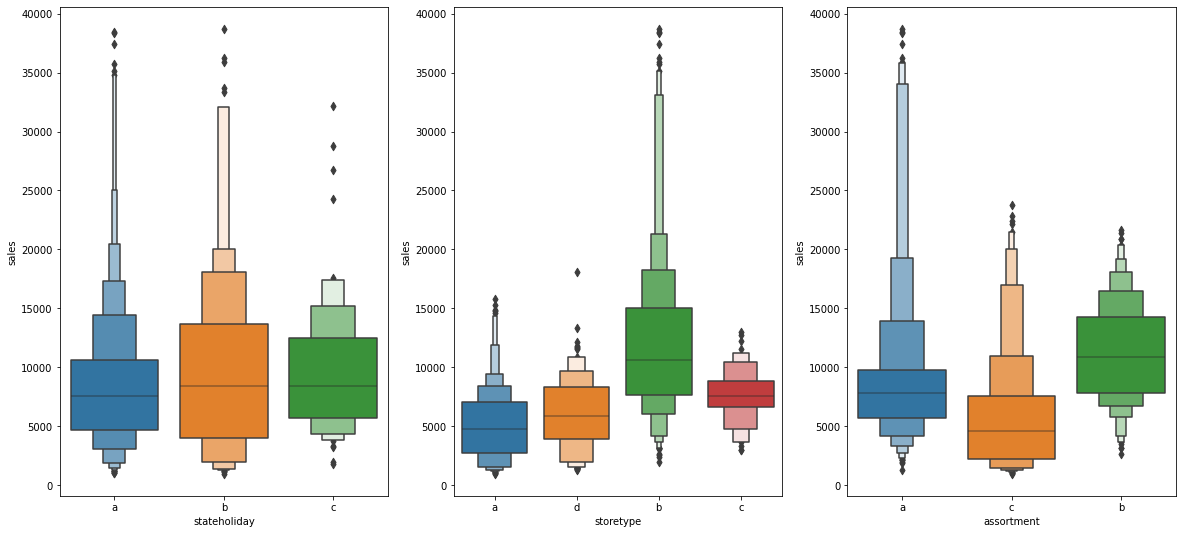

In [55]:
aux1 = df1[(df1['stateholiday'] != '0') & (df1['sales'] > 0)]
fig = plt.figure(figsize=(20,9))
plt.subplot(1, 3, 1)
sns.boxenplot(x='stateholiday', y='sales', data=aux1)
plt.subplot(1, 3, 2)
sns.boxenplot(x='storetype', y='sales', data=aux1)
plt.subplot(1, 3, 3)
sns.boxenplot(x='assortment', y='sales', data=aux1)

# 2.0. PASSO 2: FEATURE ENGINNEERING




## 2.1. MAPA MENTAL DE HIPOTESES

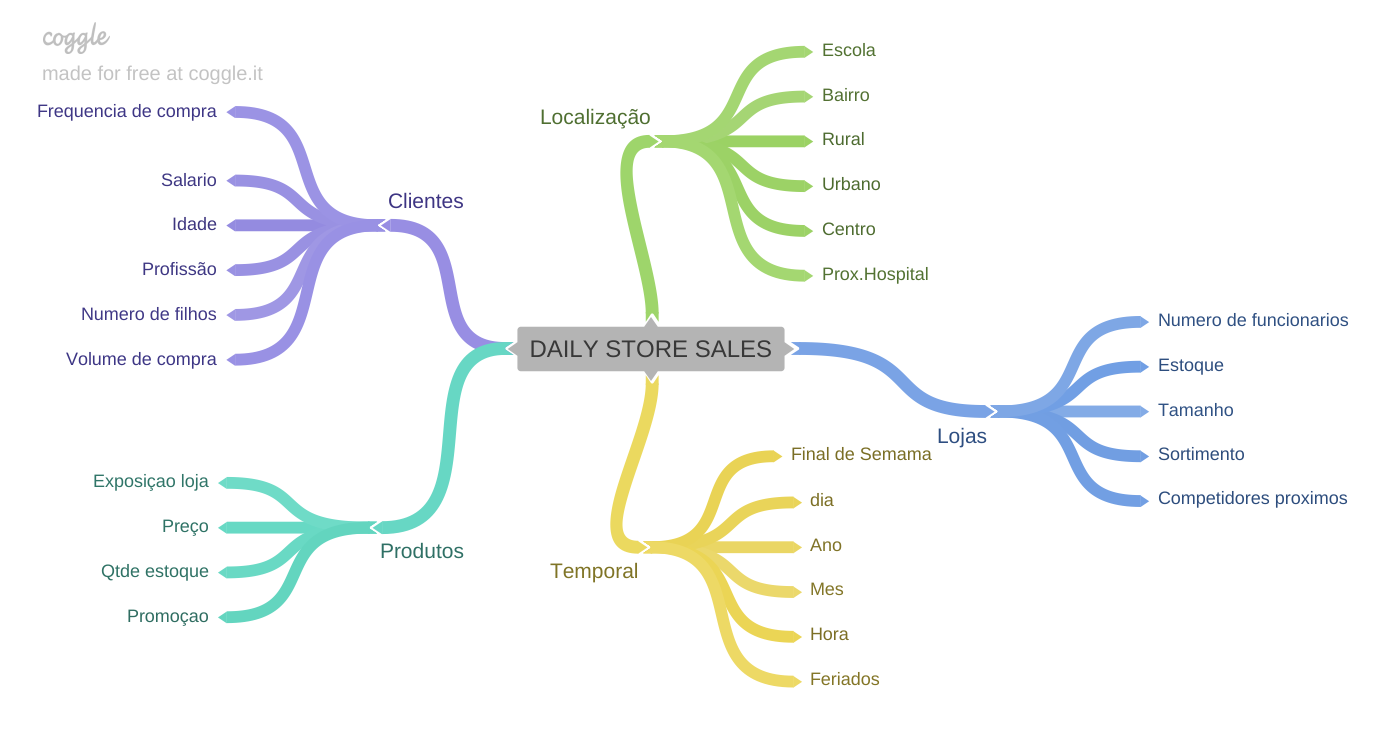

In [56]:
img('/content/data/MindsMapHypotese.png')

## 2.2. Criaca das Hipoteses

In [58]:
df2 = df1.copy()

### 2.2.1 Hipoteses LOJA

1. Lojas com número maior de funcionários deveriam vender mais.

2. Lojas com maior capacidade de estoque deveriam vender mais.

3. Lojas com maior porte deveriam vender mais.

4. Lojas com maior sortimentos deveriam vender mais.

5. Lojas com competidores mais próximos deveriam vender menos.

6. Lojas com competidores à mais tempo deveriam vendem mais.

### 2.2.2 Hipoteses PRODUTO

1. Lojas que investem mais em Marketing deveriam vender mais.

2. Lojas com maior exposição de produto deveriam vender mais.

3. Lojas com produtos com preço menor deveriam vender mais.

5. Lojas com promoções mais agressivas ( descontos maiores ), deveriam vender mais.

6. Lojas com promoções ativas por mais tempo deveriam vender mais.

7. Lojas com mais dias de promoção deveriam vender mais.

8. Lojas com mais promoções consecutivas deveriam vender mais.

### 2.2.3 Hipoteses TEMPO

1. Lojas abertas durante o feriado de Natal deveriam vender mais.

2. Lojas deveriam vender mais ao longo dos anos.

3. Lojas deveriam vender mais no segundo semestre do ano.

4. Lojas deveriam vender mais depois do dia 10 de cada mês.

5. Lojas deveriam vender menos aos finais de semana.

6. Lojas deveriam vender menos durante os feriados escolares.

##2.3 lista Final de Hipoteses

1. Lojas com maior sortimentos deveriam vender mais.

2. Lojas com competidores mais próximos deveriam vender menos.

3. Lojas com competidores à mais tempo deveriam vendem mais.

4. Lojas com promoções ativas por mais tempo deveriam vender mais.

5. Lojas com mais dias de promoção deveriam vender mais.

7. Lojas com mais promoções consecutivas deveriam vender mais.

8. Lojas abertas durante o feriado de Natal deveriam vender mais.

9. Lojas deveriam vender mais ao longo dos anos.

10. Lojas deveriam vender mais no segundo semestre do ano.

11. Lojas deveriam vender mais depois do dia 10 de cada mês.

12. Lojas deveriam vender menos aos finais de semana.

13. Lojas deveriam vender menos durante os feriados escolares.

## 2.4. FEATURE ENGINEERING


In [82]:
#yer
df2['year'] = df2['date'].dt.year

#month
df2['month'] = df2['date'].dt.month

#day
df2['day'] = df2['date'].dt.day

# week for yer
df2['week_of_year'] = df2['date'].dt.weekofyear

#year week
df2['year_week'] = df2['date'].dt.strftime('%Y-%W')

#competition since 
df2['competition_since'] = df2.apply(lambda x: datetime.datetime(year=x['competitionopensinceyear'], month=x['competitionopensincemonth'], day=1),axis=1)
df2['competition_time_month'] = ((df2['date'] - df2['competition_since']) / 30).apply(lambda x: x.days).astype(int)

#promo since
df2['promo_since'] = df2['promo2sinceyear'].astype(str) + '-' + df2['promo2sinceweek'].astype(str)
df2['promo_since'] = df2['promo_since'].apply( lambda x: datetime.datetime.strptime( x + '-1', '%Y-%W-%w' ) - datetime.timedelta( days=7 ) )
df2['promo_time_week'] = ( ( df2['date'] - df2['promo_since'] )/7 ).apply( lambda x: x.days ).astype( int )

#assortment
df2['assortment'] = df2['assortment'].apply(lambda x: 'basic' if x == 'a' else 'extra' if x == 'b' else 'extended')

#stateholiday
df2['stateholiday'] = df2['stateholiday'].apply(lambda x: 'public holiday' if x == 'a' else 'Easter holiday' if x == 'b' else 'Christmas' if x == 'c' else 'regular_day')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  # This is added back by InteractiveShellApp.init_path()
